<a href="https://colab.research.google.com/github/ChristianWussow/Portfolio/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import Adam
import keras
from keras import models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import datetime
import cv2
import glob
from PIL import Image
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMG_SIZE = (48,48)
BATCH_SIZE = 32

In [ ]:
train_data= image_dataset_from_directory(
    '/content/drive/MyDrive/Phyton/CLA/CNN/FER_2013/train/',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=0,
    validation_split= None,
    subset= None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False

)




Found 28709 files belonging to 7 classes.


In [ ]:
test_data= image_dataset_from_directory(
    '/content/drive/MyDrive/Phyton/CLA/CNN/FER_2013/test',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=0,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 7178 files belonging to 7 classes.


In [ ]:
class_names = train_data.class_names
print(class_names)

#train_loader= train_data
#test_loader = val_data
#final_loader = train_data



['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

base_model = tf.keras.applications.vgg16.VGG16(input_shape=(48, 48, 3), include_top=False, weights='imagenet')
base_model.trainable = False



SyntaxError: ignored

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

input = tf.keras.Input(shape=(48,48,3))
x = preprocess_input(input)

x = tf.keras.layers.Resizing(224,224)(x)
x = tf.keras.layers.RandomFlip(mode='horizontal')(x)
x = tf.keras.layers.RandomRotation(0.10)(x)
x = tf.keras.layers.RandomZoom(0.10)(x)
#x = tf.keras.layers.Rescaling(1./255)(x)


#pretrained_model=tf.keras.applications.vgg16.VGG16(input_shape=(48, 48, 3), include_top=False, weights='imagenet')
pretrained_model=tf.keras.applications.vgg16.VGG16(input_shape=(224, 224, 3), include_top=False)


for layer in pretrained_model.layers:
     layer.trainable = True


last_layer = pretrained_model.get_layer('block5_pool')
print('last layer of vgg : output shape: ', last_layer.output_shape)


last_output= last_layer.output

x = pretrained_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu', kernel_initializer='he_normal' )(x)
x = layers.Dropout(0.3)(x)



output = layers.Dense(7, activation='softmax')(x)           

model = Model(input, output) 

model.compile(optimizer = Adam(learning_rate = 1e-4), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

last layer of vgg : output shape:  (None, 7, 7, 512)


In [ ]:
model.summary()

Model: "model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_56 (InputLayer)       [(None, 48, 48, 3)]       0         
                                                                 
 tf.__operators__.getitem_22  (None, 48, 48, 3)        0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_22 (TFOpLamb  (None, 48, 48, 3)        0         
 da)                                                             
                                                                 
 resizing_17 (Resizing)      (None, 224, 224, 3)       0         
                                                                 
 random_flip_33 (RandomFlip)  (None, 224, 224, 3)      0         
                                                                 
 random_rotation_33 (RandomR  (None, 224, 224, 3)      0  

In [ ]:
model_history = model.fit(train_data, validation_data=test_data, epochs = 50, verbose=1,
    use_multiprocessing=True)

Epoch 1/50
898/898 [==============================] - 76s 83ms/step - loss: 1.8896 - accuracy: 0.2443 - val_loss: 1.8129 - val_accuracy: 0.2442
Epoch 2/50
898/898 [==============================] - 74s 83ms/step - loss: 1.7953 - accuracy: 0.2569 - val_loss: 1.7829 - val_accuracy: 0.2593
Epoch 3/50
898/898 [==============================] - 75s 83ms/step - loss: 1.7835 - accuracy: 0.2585 - val_loss: 1.7665 - val_accuracy: 0.2641
Epoch 4/50
138/898 [===>..........................] - ETA: 58s - loss: 1.7492 - accuracy: 0.2831

KeyboardInterrupt: ignored

Train Accuracy: 0.814, Test Accuracy: 0.668


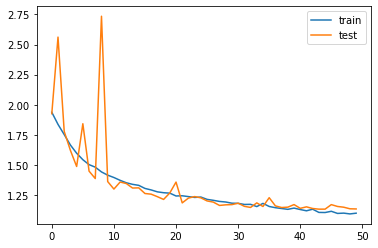

In [ ]:
_, train_acc = model.evaluate(train_data, verbose = 0)
_, test_acc = model.evaluate(test_data, verbose = 0)
print("Train Accuracy: %.3f, Test Accuracy: %.3f" % (train_acc, test_acc))
plt.plot(model_history.history['loss'], label = 'train')
plt.plot(model_history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()




base_model = tf.keras.applications.vgg16.VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

inputs = tf.keras.Input(shape=(224,224,3))
#x = tf.keras.layers.RandomFlip(mode='horizontal')(inputs)
#x = tf.keras.layers.RandomZoom(0.1)(x)
#x = tf.keras.layers.RandomRotation(0.1)(x)
#x = data_augmentation(inputs)                    
x = preprocess_input(inputs)     
x = tf.keras.layers.RandomFlip(mode='horizontal')(x)            
x = base_model(x, training=False)
#x = global_average_layer(x)  
      
      
#x = global_average_layer(x) 
x = layers.Flatten()(x)
#x = layers.Dense(1024, activation='relu',kernel_initializer='he_normal')(x)
#x = tf.keras.layers.Dropout(0.3)(x)
x = layers.Dense(1024, activation='relu', kernel_initializer='he_normal')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)     
outputs = layers.Dense(7, activation='softmax')(x)              

model = tf.keras.Model(inputs, outputs)


model.compile(optimizer = Adam(learning_rate = 1e-4), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
model_history = model.fit(train_data, validation_data=test_data, epochs = 50, verbose=1,
    use_multiprocessing=True)

In [ ]:
inputs = tf.keras.Input(shape=(48,48,3))

x = tf.keras.layers.Rescaling(1/255.0)(inputs)
x = tf.keras.layers.RandomFlip(mode='horizontal')(x)
x = tf.keras.layers.RandomRotation(0.15)(x)
x = tf.keras.layers.RandomZoom(0.15)(x)



x = tf.keras.layers.Conv2D(
    filters=64, kernel_size=(5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Conv2D(
    filters=128, kernel_size=(5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Conv2D(
    filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Conv2D(
    filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Conv2D(
    filters=512, kernel_size=(3, 3), activation='relu', padding='same')(x)
#x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)


x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten()(x)

x = layers.Dense(1024, activation='relu', kernel_initializer='he_normal')(x)

#x = layers.Dense(1024, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l1_l2')(x)
#x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)  

x = layers.Dense(512, activation='relu', kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dropout(0.4)(x) 


outputs = layers.Dense(7, activation='softmax')(x)              

model = tf.keras.Model(inputs, outputs)


model.compile(optimizer = Adam(learning_rate = 1e-4), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])


In [ ]:
model.summary()

Model: "model_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_74 (InputLayer)       [(None, 48, 48, 3)]       0         
                                                                 
 rescaling_23 (Rescaling)    (None, 48, 48, 3)         0         
                                                                 
 random_flip_48 (RandomFlip)  (None, 48, 48, 3)        0         
                                                                 
 random_rotation_48 (RandomR  (None, 48, 48, 3)        0         
 otation)                                                        
                                                                 
 random_zoom_48 (RandomZoom)  (None, 48, 48, 3)        0         
                                                                 
 conv2d_96 (Conv2D)          (None, 48, 48, 64)        4864      
                                                          

In [ ]:
model_history = model.fit(train_data, validation_data=test_data, epochs = 50, verbose=1,
    use_multiprocessing=True)

Epoch 1/50
898/898 [==============================] - 26s 27ms/step - loss: 1.8234 - accuracy: 0.2454 - val_loss: 1.7986 - val_accuracy: 0.2536
Epoch 2/50
898/898 [==============================] - 24s 27ms/step - loss: 1.7897 - accuracy: 0.2586 - val_loss: 1.7412 - val_accuracy: 0.2792
Epoch 3/50
898/898 [==============================] - 24s 26ms/step - loss: 1.7376 - accuracy: 0.2841 - val_loss: 1.6853 - val_accuracy: 0.3111
Epoch 4/50
898/898 [==============================] - 24s 26ms/step - loss: 1.6798 - accuracy: 0.3195 - val_loss: 1.5890 - val_accuracy: 0.3745
Epoch 5/50
898/898 [==============================] - 24s 26ms/step - loss: 1.5924 - accuracy: 0.3711 - val_loss: 1.4541 - val_accuracy: 0.4478
Epoch 6/50
898/898 [==============================] - 24s 26ms/step - loss: 1.5098 - accuracy: 0.4078 - val_loss: 1.3977 - val_accuracy: 0.4546
Epoch 7/50
898/898 [==============================] - 24s 26ms/step - loss: 1.4504 - accuracy: 0.4366 - val_loss: 1.3873 - val_accuracy:

Train Accuracy: 0.706, Test Accuracy: 0.619


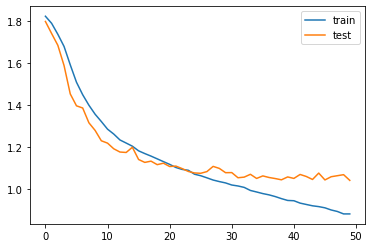

In [ ]:
_, train_acc = model.evaluate(train_data, verbose = 0)
_, test_acc = model.evaluate(test_data, verbose = 0)
print("Train Accuracy: %.3f, Test Accuracy: %.3f" % (train_acc, test_acc))
plt.plot(model_history.history['loss'], label = 'train')
plt.plot(model_history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

In [ ]:
print("Evaluate on test data")
results = model.evaluate(final_loader)
print("test loss, test acc:", results)

Evaluate on test data
1149/1149 [==============================] - 12s 11ms/step - loss: 1.1484 - accuracy: 0.6753
test loss, test acc: [1.1483782529830933, 0.6753308773040771]


In [ ]:
#model.save('G:/Meine Ablage/Phyton/CLA/CNN/FER_2013/model_50')
model.save('/content/drive/MyDrive/Phyton/CLA/CNN/FER_2013/model_50')

In [ ]:
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/Phyton/CLA/CNN/FER_2013/model_50")


In [ ]:
r = reconstructed_model.predict(final_loader)


1149/1149 [==============================] - 12s 10ms/step


In [ ]:
ex=[]
la = []
for images, labels in final_loader:
  la.append(labels)
  ex.append(images)


In [ ]:
pictures= ex[0][10:19]
labels = la[0][10:19]
images = pictures
predictions = model.predict(pictures)

1/1 [==============================] - 0s 23ms/step


In [ ]:


print(class_names)
print(labels)
for i in range(len(predictions)):
  #print(predictions[i].max())

  print(np.argmax(predictions[i]))

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
tf.Tensor([0 4 5 2 0 5 6 2 6], shape=(9,), dtype=int32)
4
4
5
2
0
5
6
5
6


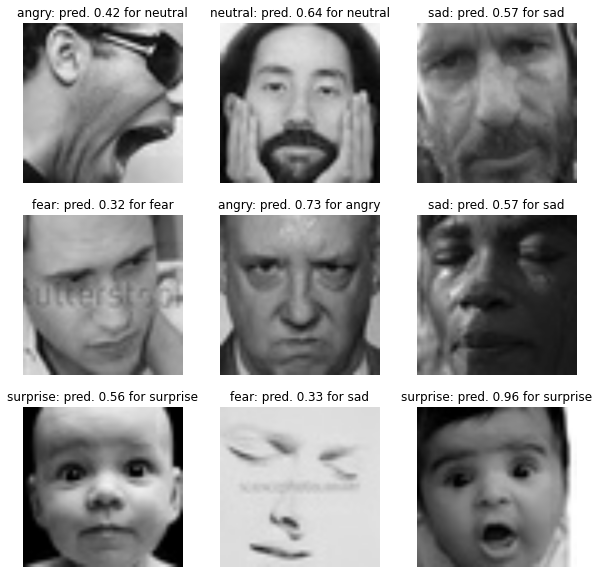

In [ ]:
plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(images[i]/255.)
    age= labels[i]
    age= class_names[age]
    emo=np.argmax(predictions[i], axis=None)
    
    #prob = round(np.amax(predictions[i], axis=None),2)
    prob = round(float(predictions[i].max()),2)
    emo =int(np.where(predictions[i] == predictions[i].max())[0]) 
    
    group = class_names[emo]
    plt.title("{age}: pred. {prob} for {group}".format(age=age,prob=prob, group=group))
    plt.axis('off')

In [ ]:
print("Generate predictions for 9 samples")
sample = test_loader.take(1)

prediction = model.predict(sample)
predictions = prediction[:9]
print("predictions shape:", predictions.shape)
image_batch, labels_batch = next(iter(sample))
images = image_batch.numpy()[:9]
labels = labels_batch.numpy()[:9]
print(image_batch.shape)
print(labels.shape)
type(labels)

print(class_names)
print(labels)
for i in range(len(predictions)):
  print(predictions[i].max())

  print(np.argmax(predictions[i]))


Generate predictions for 9 samples


NameError: ignored

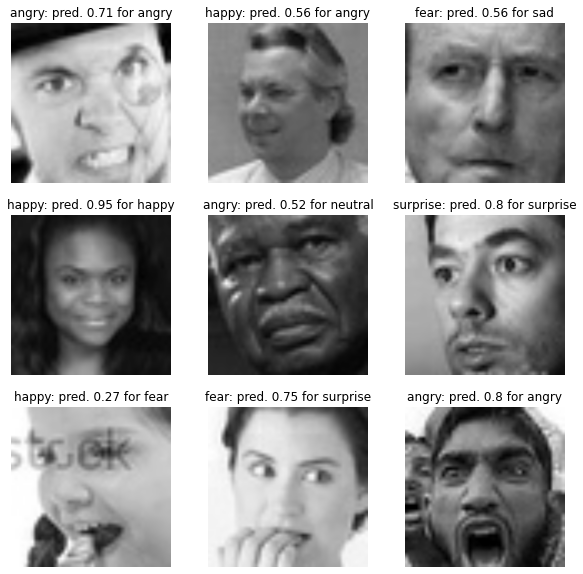

In [ ]:
plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(images[i]/255.)
    age= labels[i]
    age= class_names[age]
    emo=np.argmax(predictions[i], axis=None)
    
    #prob = round(np.amax(predictions[i], axis=None),2)
    prob = round(float(predictions[i].max()),2)
    emo =int(np.where(predictions[i] == predictions[i].max())[0]) 
    
    group = class_names[emo]
    plt.title("{age}: pred. {prob} for {group}".format(age=age,prob=prob, group=group))
    plt.axis('off')

In [ ]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
#You can call .numpy() on the image_batch and labels_batch tensors to convert them to a numpy.ndarray.

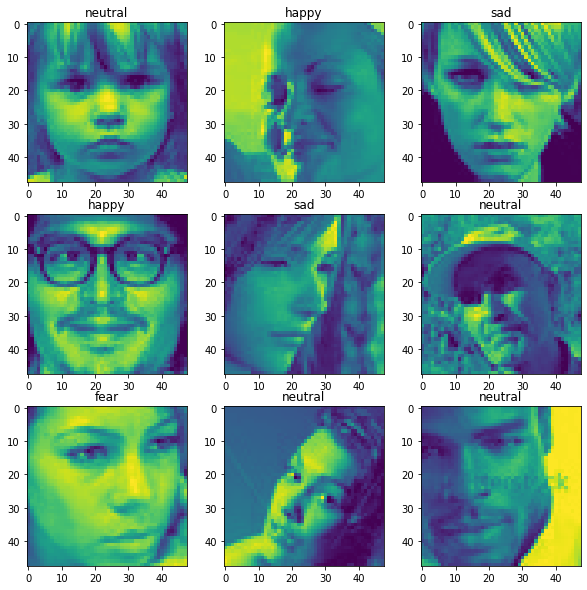

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(3):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("on")

In [ ]:
## manually agugmenting and transforming

IMG_SIZE = 224

transforms_general = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
    layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    #layers.RandomRotation(0.1),
    #layers.RandomCrop(74, 74)   
])

def prepare(ds, shuffle = False, augment = False):
  ds = ds.map(lambda x,y: (transforms_general(x),y))

  if shuffle:
    ds = ds.shuffle(1000)
  
  #ds = ds.batch(batch_size)

  result = ds

  if augment:
    augmented_ds = ds.map(lambda x,y: (data_augmentation(x),y),
          num_parallel_calls = tf.data.AUTOTUNE)
    result = augmented_ds.concatenate(ds)

  return result.prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
train_loader = prepare(train_data, shuffle = False, augment = True)
test_loader = prepare(val_data)
final_loader = prepare(test_data)


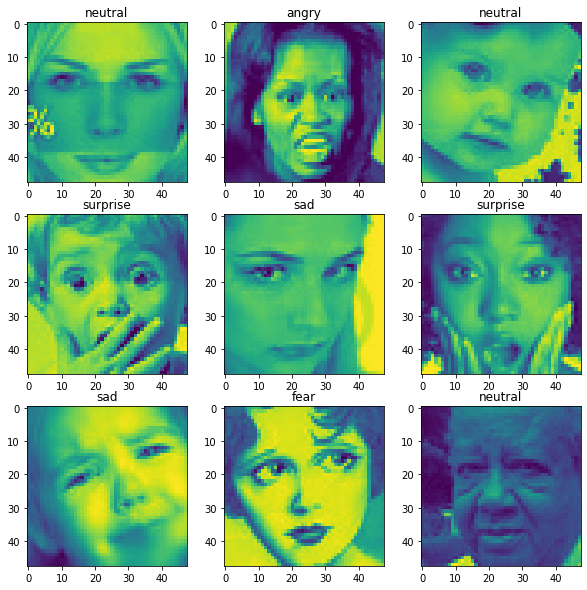

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_loader.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy())
    plt.title(class_names[labels[i]])
    plt.axis("on")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)
val_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_data_train = train_data.map(lambda x, y: (normalization_layer(x), y))
normalized_data_val = val_data.map(lambda x, y: (normalization_layer(x), y))
normalized_data_test = test_data.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
train_loader= normalized_data_train
test_loader = normalized_data_val
final_loader = normalized_data_test

In [ ]:
Resizing = layers.experimental.preprocessing.Resizing(224, 224)

In [ ]:
from tensorflow.keras.applications import VGG16


#pretrained_model=VGG16(input_shape = (244, 244, 3), 
                        #include_top = False, 
                        #weights = 'imagenet')

pretrained_model=VGG16(input_shape = (224, 224, 3), 
                        include_top = False, 
                        weights = 'imagenet')

for layer in pretrained_model.layers:
     layer.trainable = False

# pretrained_model.summary()
last_layer = pretrained_model.get_layer('block5_pool')
print('last layer of vgg : output shape: ', last_layer.output_shape)
last_output= last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(10, activation='relu')(x)
x = layers.Dropout(0.3)(x)                  
x = layers.Dense(7, activation='softmax')(x)           

model_vgg = Model(pretrained_model.input, x) 


model_vgg.compile(optimizer = Adam(learning_rate = 1e-4), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])

last layer of vgg : output shape:  (None, 7, 7, 512)


In [ ]:
model_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
with tf.device('/GPU:0'):
    model_history = model_vgg.fit(train_loader, validation_data=test_loader, epochs = 7, verbose=1, 
    workers=4, use_multiprocessing=True)

Epoch 1/7
  3/180 [..............................] - ETA: 3:18:12 - loss: 2.4976 - acc: 0.1328

KeyboardInterrupt: ignored

Train Accuracy: 0.463, Test Accuracy: 0.432


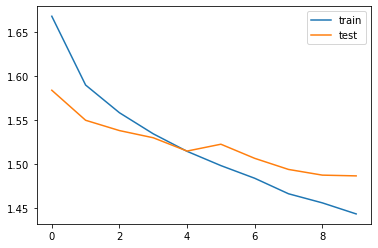

In [ ]:
print("Evaluate on test data")
results = model_vgg.evaluate(final_loader)
print("test loss, test acc:", results)


Evaluate on test data
225/225 [==============================] - 57s 247ms/step - loss: 1.4497 - acc: 0.4551
test loss, test acc: [1.449723482131958, 0.45514070987701416]


In [ ]:

print("Generate predictions for 9 samples")
prediction = model_vgg.predict(final_loader.take(1))
predictions = prediction[:9]
print("predictions shape:", predictions.shape)


Generate predictions for 9 samples
1/1 [==============================] - 1s 757ms/step
predictions shape: (9, 7)


In [ ]:
image_batch, labels_batch = next(iter(final_loader.take(1)))
images = image_batch.numpy()[:9]
labels = labels_batch.numpy()[:9]
print(images.shape)
print(labels.shape)

(9, 48, 48, 3)
(9,)


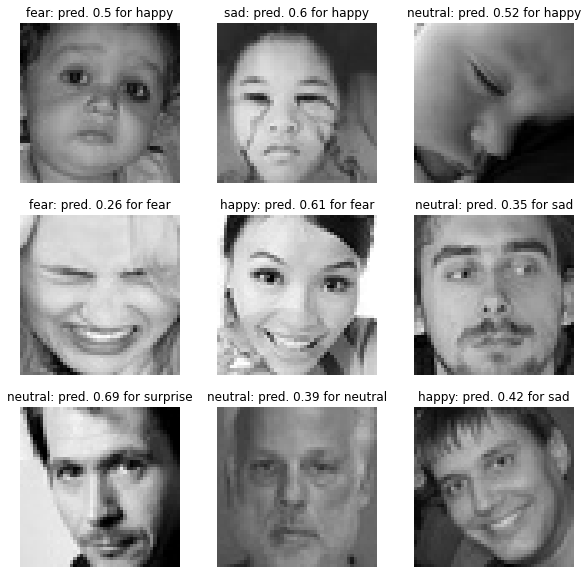

In [ ]:
plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(images[i])
    age= np.array(labels)[i]
    age= class_names[age]
    prob = round(float(predictions[i].max()),2)
    emo =int(np.where(predictions[i] == predictions[i].max())[0])    
    group = class_names[emo]
    plt.title("{age}: pred. {prob} for {group}".format(age=age,prob=prob, group=group))
    plt.axis('off')

In [ ]:
model=Sequential([
    
    Conv2D(32,5, padding = 'same', activation = 'relu', input_shape = (48,48,3)),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(64,5, padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(64,5, padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(units = 1024, activation = 'ReLU'),
    Dropout(0.3),
    Dense(units = 7, activation = 'softmax')
])

model.compile(optimizer = Adam(learning_rate = 1e-4), 
              loss = SparseCategoricalCrossentropy(), 
              metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        832       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        102464    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)        

In [ ]:
with tf.device('/GPU:0'):
  model.fit(train_loader, validation_data=test_loader, epochs = 10, verbose=1)

Epoch 1/10
1258/1258 [==============================] - 216s 140ms/step - loss: 1.6491 - accuracy: 0.3488 - val_loss: 1.5032 - val_accuracy: 0.4263
Epoch 2/10
1258/1258 [==============================] - 216s 143ms/step - loss: 1.4191 - accuracy: 0.4597 - val_loss: 1.4134 - val_accuracy: 0.4582
Epoch 3/10
1258/1258 [==============================] - 218s 142ms/step - loss: 1.2878 - accuracy: 0.5143 - val_loss: 1.3289 - val_accuracy: 0.4965
Epoch 4/10
1258/1258 [==============================] - 225s 150ms/step - loss: 1.1728 - accuracy: 0.5629 - val_loss: 1.2879 - val_accuracy: 0.5161
Epoch 5/10
1258/1258 [==============================] - 254s 168ms/step - loss: 1.0616 - accuracy: 0.6066 - val_loss: 1.2483 - val_accuracy: 0.5425
Epoch 6/10
1258/1258 [==============================] - 233s 156ms/step - loss: 0.9425 - accuracy: 0.6578 - val_loss: 1.2680 - val_accuracy: 0.5379
Epoch 7/10
1258/1258 [==============================] - 234s 150ms/step - loss: 0.8283 - accuracy: 0.7021 - val_

Train Accuracy: 0.834, Test Accuracy: 0.524


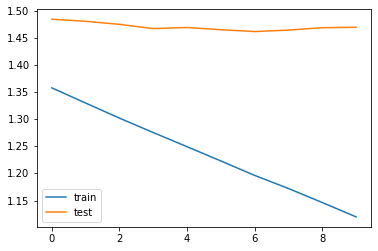

In [ ]:
_, train_acc = model.evaluate(train_loader, verbose = 0)
_, test_acc = model.evaluate(test_loader, verbose = 0)
print("Train Accuracy: %.3f, Test Accuracy: %.3f" % (train_acc, test_acc))
plt.plot(model_history.history['loss'], label = 'train')
plt.plot(model_history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

In [ ]:
print("Evaluate on test data")
results = model.evaluate(final_loader)
print("test loss, test acc:", results)


Evaluate on test data
225/225 [==============================] - 22s 93ms/step - loss: 1.5139 - accuracy: 0.5496
test loss, test acc: [1.513945460319519, 0.5495960116386414]


In [ ]:
print("Generate predictions for 9 samples")
prediction = model.predict(final_loader.take(1))
predictions = prediction[:9]
print("predictions shape:", predictions.shape)


Generate predictions for 9 samples
1/1 [==============================] - 1s 1s/step
predictions shape: (9, 7)


In [ ]:
image_batch, labels_batch = next(iter(final_loader.take(1)))
images = image_batch.numpy()[:9]
labels = labels_batch.numpy()[:9]
print(images.shape)
print(labels.shape)

(9, 48, 48, 1)
(9,)


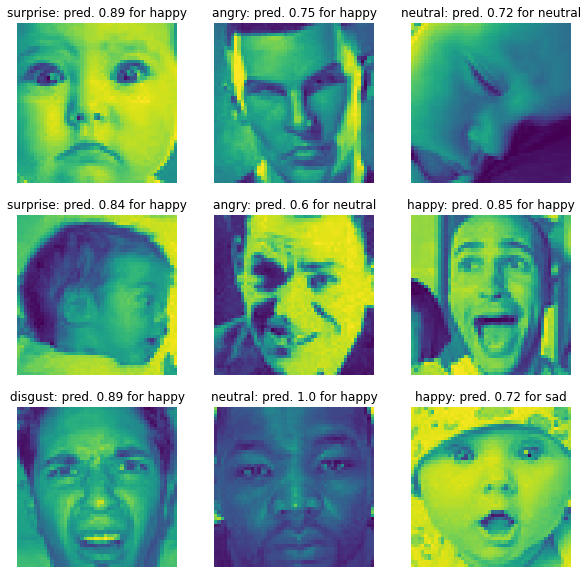

In [ ]:
plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(images[i])
    age= np.array(labels)[i]
    age= class_names[age]
    prob = round(float(predictions[i].max()),2)
    emo =int(np.where(predictions[i] == predictions[i].max())[0])    
    group = class_names[emo]
    plt.title("{age}: pred. {prob} for {group}".format(age=age,prob=prob, group=group))
    plt.axis('off')

In [ ]:
data= image_dataset_from_directory(
    'G:/Meine Ablage/Fotos/StudioLine/',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    #batch_size=32,
    image_size=(1024, 1024),
    #shuffle=True,
    seed=0,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=True,
)

Found 3 files belonging to 1 classes.


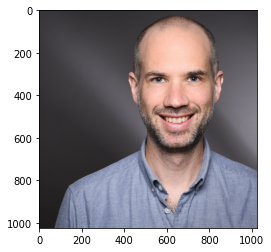

In [ ]:
image_batch, labels_batch = next(iter(data))
image = image_batch[0]/255.
plt.imshow(image)

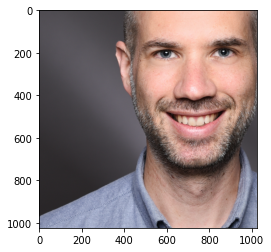

In [ ]:
result = tf.image.central_crop(image,central_fraction =0.6)
height, width = image.shape[0], image.shape[1]
#height, width = 48, 48

resize = layers.experimental.preprocessing.Resizing(height, width)
result = resize(result)
plt.imshow(result.numpy())

In [ ]:
from tensorflow import image

In [ ]:
im = tf.image.resize(
    result,
    [48,48],
    #method=ResizeMethod.BILINEAR,
    preserve_aspect_ratio=True,
    antialias=False,
    name=None
    
    
)

im = im.numpy()
train_labels = ['happy']
type(im)
bb=im.reshape(1,1,48,48,3)
bb.shape

(1, 1, 48, 48, 3)

In [ ]:
aa = tf.data.Dataset.from_tensor_slices((bb, train_labels))
aa


<TensorSliceDataset element_spec=(TensorSpec(shape=(1, 48, 48, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

In [ ]:
predictions = model.predict(aa)


1/1 [==============================] - 0s 24ms/step


IndexError: index 1 is out of bounds for axis 0 with size 1

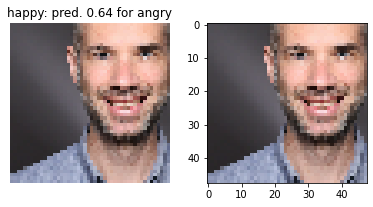

In [ ]:
plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(im)
    #age= np.array(labels)[i]
    age= train_labels[0]
    prob = round(float(predictions[i].max()),2)
    emo =int(np.where(predictions[i] == predictions[i].max())[0])    
    group = class_names[emo]
    plt.title("{age}: pred. {prob} for {group}".format(age=age,prob=prob, group=group))
    plt.axis('off')

In [ ]:
#prediction = np.array([])
labels =  np.array([])
for x, y in test_loader.take(1):
  #prediction = np.concatenate([prediction, model_vgg.predict(x)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

#tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 0 dimension(s)

In [ ]:
lst = []
for images, labels in test_loader.take(1):
  for i in range(9):
    lst.append
    plt.imshow(images[i].numpy())
    plt.axis('off')

In [ ]:
train_loader = prepare(train_data, shuffle = False, augment = True)
test_loader = prepare(test_data)

In [ ]:
print(len(train_loader)*32)
len(train_data)*32*2

57472


57472

In [ ]:
print(len(test_loader)*32)
len(test_data)*32

7200


7200

In [ ]:
image_batch, labels_batch = next(iter(train_loader))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.50174636


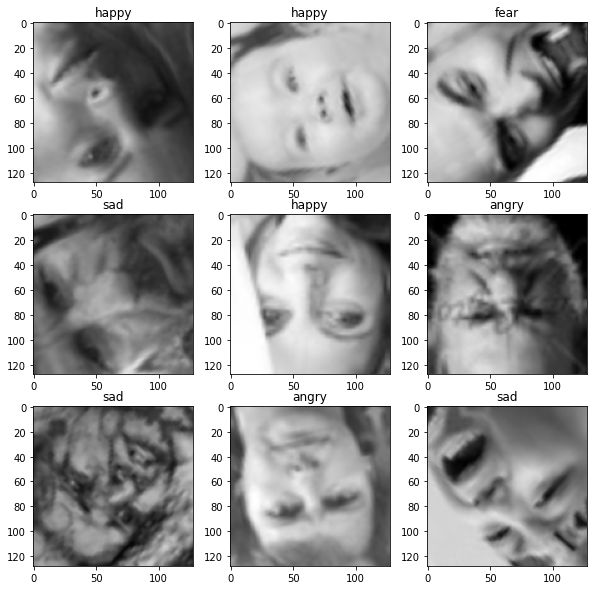

In [ ]:
imdir0 = 'G:/Meine Ablage/Phyton/CLA/CNN/FER_2013/train/angry/'
imdir1 = 'G:/Meine Ablage/Phyton/CLA/CNN/FER_2013/train/disgust/'
imdir2 = 'G:/Meine Ablage/Phyton/CLA/CNN/FER_2013/train/fear/'
imdir3 = 'G:/Meine Ablage/Phyton/CLA/CNN/FER_2013/train/happy/'
imdir4 = 'G:/Meine Ablage/Phyton/CLA/CNN/FER_2013/train/sad/'
imdir5 = 'G:/Meine Ablage/Phyton/CLA/CNN/FER_2013/train/surprise/'
imdir6 = 'G:/Meine Ablage/Phyton/CLA/CNN/FER_2013/train/neutral/'

In [ ]:
imdir_train=  [imdir0,imdir1,imdir2,imdir3,imdir4,imdir5,imdir6]

In [ ]:
res_train = []
for i in imdir_train:
    ext = ['png', 'jpg', 'gif']    # Add image formats here
    
   
    files = []
    [files.extend(glob.glob(i + '*.' + e)) for e in ext]

    image = [cv2.imread(file) for file in files]
    res_train.append(image)

KeyboardInterrupt: 

In [ ]:
images_angry = np.array(res_train[0])
images_disg= np.array(res_train[1])
images_fear= np.array(res_train[2])
images_happy= np.array(res_train[3])
images_sad= np.array(res_train[4])
images_surprise= np.array(res_train[5])
images_neutral= np.array(res_train[6])

### Resizing for VGG16

In [ ]:
resize = tf.keras.layers.experimental.preprocessing.Resizing(224, 224)
result = np.array(resize(images_neutral))
#print(result.shape)
#imshow(result.numpy().astype("uint8"))
result.shape

(4965, 224, 224, 3)

28709

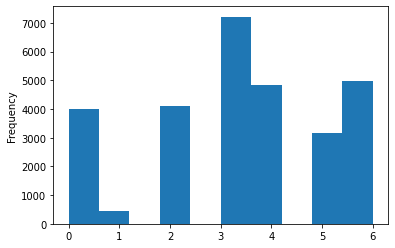

In [ ]:
emotion = []
for i in range(len(images_angry)):
    emotion.append(0)
for i in range(len(images_disg)):
    emotion.append(1)
for i in range(len(images_fear)):
    emotion.append(2)
for i in range(len(images_happy)):
    emotion.append(3)
for i in range(len(images_sad)):
    emotion.append(4)
for i in range(len(images_surprise)):
    emotion.append(5)
for i in range(len(images_neutral)):
    emotion.append(6)


y_train= pd.Series(emotion)
y_train.plot(kind='hist')
len(y_train)

In [ ]:

X_train = np.concatenate([images_angry, images_disg, images_fear, images_happy, images_sad, images_surprise, images_neutral])
X_train.shape

(28709, 48, 48, 3)

In [ ]:
resize = tf.keras.layers.experimental.preprocessing.Resizing(224, 224)

X_train = np.concatenate([resize(images_angry), resize(images_disg), resize(images_fear), resize(images_happy), resize(images_sad), resize(images_surprise), resize(images_neutral)])
X_train.shape

MemoryError: Unable to allocate 16.1 GiB for an array with shape (28709, 224, 224, 3) and data type float32

In [ ]:
timdir0 = 'G:/Meine Ablage/Phyton/CLA/CNN/FER_2013/test/angry/'
timdir1 = 'G:/Meine Ablage/Phyton/CLA/CNN/FER_2013/test/disgust/'
timdir2 = 'G:/Meine Ablage/Phyton/CLA/CNN/FER_2013/test/fear/'
timdir3 = 'G:/Meine Ablage/Phyton/CLA/CNN/FER_2013/test/happy/'
timdir4 = 'G:/Meine Ablage/Phyton/CLA/CNN/FER_2013/test/sad/'
timdir5 = 'G:/Meine Ablage/Phyton/CLA/CNN/FER_2013/test/surprise/'
timdir6 = 'G:/Meine Ablage/Phyton/CLA/CNN/FER_2013/test/neutral/'

In [ ]:
imdir_test=  [timdir0,timdir1,timdir2,timdir3,timdir4,timdir5,timdir6]

In [ ]:
res_test = []
for i in imdir_test:
    ext = ['png', 'jpg', 'gif']    # Add image formats here
    
   
    files = []
    [files.extend(glob.glob(i + '*.' + e)) for e in ext]

    image = [cv2.imread(file) for file in files]
    res_test.append(image)

In [ ]:
timages_angry = np.array(res_test[0])
timages_disg= np.array(res_test[1])
timages_fear= np.array(res_test[2])
timages_happy= np.array(res_test[3])
timages_sad= np.array(res_test[4])
timages_surprise= np.array(res_test[5])
timages_neutral= np.array(res_test[6])

7178

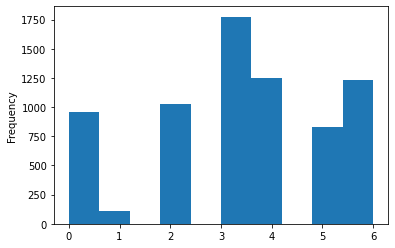

In [ ]:
temotion = []
for i in range(len(timages_angry)):
    temotion.append(0)
for i in range(len(timages_disg)):
    temotion.append(1)
for i in range(len(timages_fear)):
    temotion.append(2)
for i in range(len(timages_happy)):
    temotion.append(3)
for i in range(len(timages_sad)):
    temotion.append(4)
for i in range(len(timages_surprise)):
    temotion.append(5)
for i in range(len(timages_neutral)):
    temotion.append(6)


y_test= pd.Series(temotion)
y_test.plot(kind='hist')
len(y_test)

In [ ]:
X_test = np.concatenate([timages_angry, timages_disg, timages_fear, timages_happy, timages_sad, timages_surprise, timages_neutral])
X_test.shape

(7178, 48, 48, 3)

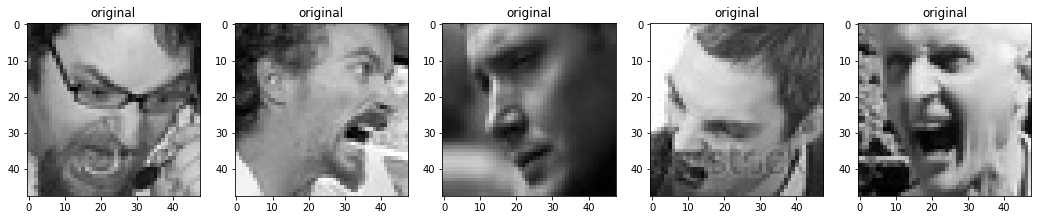

In [ ]:
n = 5
plt.figure(figsize=(18,8))
for i in range (n):
    plt.subplot(1,n, i+1)
    plt.imshow(X_test[i])
    plt.title('original')


In [ ]:

#img= X_test[0]
#cv2.imshow('image',img)


In [ ]:

#X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
## manually agugmenting and transforming

IMG_SIZE = 224

transforms_general = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),    
])

def prepare(ds, shuffle = False, augment = False, batch_size = 32):
  ds = ds.map(lambda x,y: (transforms_general(x),y))

  if shuffle:
    ds = ds.shuffle(1000)
  
  ds = ds.batch(batch_size)

  result = ds

  if augment:
    augmented_ds = ds.map(lambda x,y: (data_augmentation(x),y),
          num_parallel_calls = tf.data.AUTOTUNE)
    result = augmented_ds.concatenate(ds)

  return result.prefetch(buffer_size = tf.data.AUTOTUNE)

: 

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train,y_train))
test_ds = tf.data.Dataset.from_tensor_slices((X_test,y_test))

In [ ]:
train_loader = prepare(train_ds, shuffle = True, augment = True)
test_loader = prepare(test_ds)

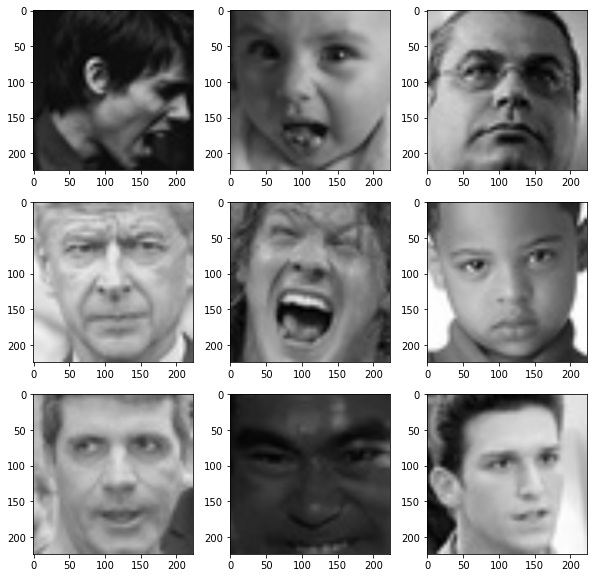

In [ ]:
plt.figure(figsize=(10,10))
for images, labels in train_loader.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i+1)
    plt.imshow(images[i].numpy())
    plt.axis('on')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

early_stopping.monitor='val_loss'
early_stopping.patience = 3

In [ ]:
from tensorflow.keras.initializers import HeNormal, GlorotNormal
from tensorflow.keras import regularizers

In [ ]:
model=Sequential([
    #tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    Conv2D(32,3, padding = 'same', activation = 'relu', input_shape = (128,128,3)),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(32,3, padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(32,3, padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(units = 512, activation = 'LeakyReLU',kernel_initializer='he_normal', kernel_regularizer= regularizers.l1_l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(units = 7, activation = 'softmax')
])

In [ ]:
model.compile(loss = SparseCategoricalCrossentropy(), optimizer = Adam(learning_rate = 1e-4), metrics = ['accuracy'])

In [ ]:
model_history = model.fit(train_loader, validation_data=test_loader, epochs = 10, verbose=1)

Epoch 1/10
1796/1796 [==============================] - 553s 307ms/step - loss: 8.8748 - accuracy: 0.3195 - val_loss: 2.2327 - val_accuracy: 0.2400
Epoch 2/10
1796/1796 [==============================] - 548s 305ms/step - loss: 2.0339 - accuracy: 0.3489 - val_loss: 2.0176 - val_accuracy: 0.4035
Epoch 3/10
1796/1796 [==============================] - 558s 310ms/step - loss: 2.0050 - accuracy: 0.3729 - val_loss: 1.9538 - val_accuracy: 0.4373
Epoch 4/10
1796/1796 [==============================] - 556s 309ms/step - loss: 1.9744 - accuracy: 0.3822 - val_loss: 1.9983 - val_accuracy: 0.4037
Epoch 5/10
  35/1796 [..............................] - ETA: 9:08 - loss: 2.2803 - accuracy: 0.2839

KeyboardInterrupt: 

Train Accuracy: 0.507, Test Accuracy: 0.486


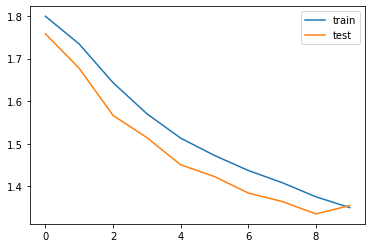

In [ ]:
_, train_acc = model.evaluate(X_train, y_train, verbose = 0)
_, test_acc = model.evaluate(X_test, y_test, verbose = 0)
print("Train Accuracy: %.3f, Test Accuracy: %.3f" % (train_acc, test_acc))
plt.plot(model_history.history['loss'], label = 'train')
plt.plot(model_history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras import regularizers

In [ ]:
base_model = tf.keras.applications.vgg16.VGG16(input_shape=(128,128, 3), include_top=False)
base_model.trainable = False

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [ ]:
data_augmentation    = tf.keras.Sequential([
                                            tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

#Dense layer for the classification
#dense_layer_1          = tf.keras.layers.Dense(units = 512, activation = 'relu', kernel_regularizer= regularizers.l1_l2(0.001))
#dense_layer_2          = tf.keras.layers.Dense(units = 64, activation = 'relu', kernel_regularizer= regularizers.l1_l2(0.001))
dense_layer_3          = tf.keras.layers.Dense(units = 7, activation = 'softmax')

In [ ]:
inputs = tf.keras.Input(shape=(128,128,3))
x = data_augmentation(inputs)                    # Data augmentation
x = preprocess_input(x)                 # Rescale the input
x = base_model(x, training=False)       # Feature extractor
x = global_average_layer(x)             # Global average on the feature maps
#x = dense_layer_1(x)
#x = tf.keras.layers.Dropout(0.3)(x)
#x = tf.keras.layers.BatchNormalization()
#x = dense_layer_2(x)
#x = tf.keras.layers.BatchNormalization()

#x = tf.keras.layers.Dropout(0.3)(x)     # Drop out layer
outputs = dense_layer_3(x)                # Final dense layer for prediction

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    loss= SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 sequential_50 (Sequential)  (None, 128, 128, 3)       0         
                                                                 
 tf.__operators__.getitem_2   (None, 128, 128, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_2 (TFOpLambd  (None, 128, 128, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0   

C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(
                        train_loader, validation_data=(test_loader),
                        epochs = 10)

Epoch 1/10
  25/1796 [..............................] - ETA: 38:07 - loss: 2.2480 - accuracy: 0.2138

KeyboardInterrupt: 

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

NameError: name 'history' is not defined